# **Reading Tiff Images**

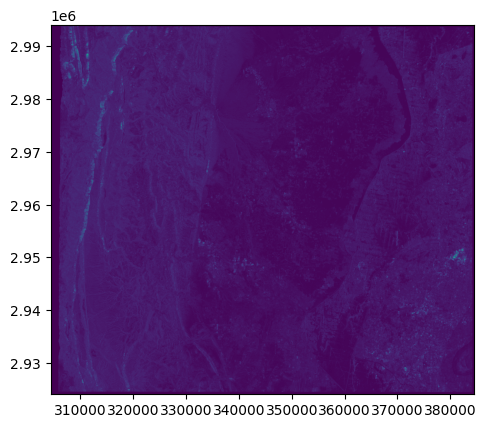

In [ ]:
import rasterio
from rasterio.plot import show

# Open the GeoTIFF file using rasterio
file_path = "/content/Dadu city.tif"
dataset = rasterio.open(file_path)
show(dataset)
dataset.close()

# Meta Data About Tiff **Images**

In [ ]:
import rasterio

# Open the GeoTIFF image
with rasterio.open("/content/Dadu city.tif") as dataset:
    # Check the size (dimensions)
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)

    # Check the number of bands
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 5700 x 4700
Number of Bands: 1


In [ ]:
dataset.count
dataset.width
dataset.height

4700

In [ ]:
import numpy as np
from PIL import Image

# Open the image
img = Image.open("/content/Dadu city.tif")

# Convert the image to a NumPy array
img_array = np.array(img)

# Calculate image statistics
mean = np.mean(img_array)
std_dev = np.std(img_array)
min = np.min(img_array)
max = np.max(img_array)

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Min:", min)
print("Max:", max)

Mean: 3642.4534343784994
Standard Deviation: 2421.605700008799
Min: 0
Max: 65535


In [ ]:
width, height = img.size

# Print the results
print("Width:", width)
print("Height:", height)

Width: 5700
Height: 4700


## Reduce Image **size** **bold text**

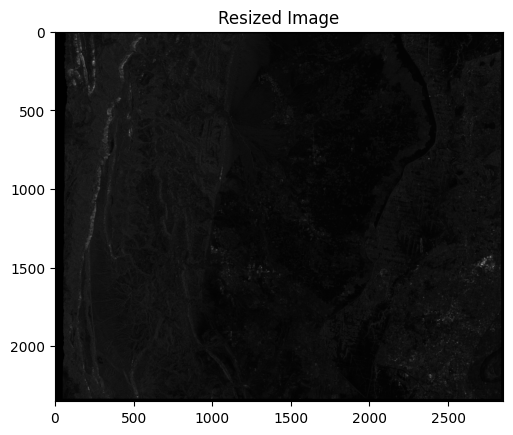

In [ ]:
import rasterio
from rasterio.plot import show
import cv2
import matplotlib.pyplot as plt

try:
    # Open the GeoTIFF file using rasterio
    file_path = "/content/Dadu city.tif"
    dataset = rasterio.open(file_path)

    # Read the raster data
    img = dataset.read(1)

    # Resize the image
    res = cv2.resize(img, (int(img.shape[1] / 2), int(img.shape[0] / 2)), interpolation=cv2.INTER_CUBIC)

    # Display the resized image
    plt.imshow(res, cmap='gray')
    plt.title("Resized Image")
    plt.show()
except IOError:
    print('Error while reading files !!!')


# **Rotating Tiff Images**

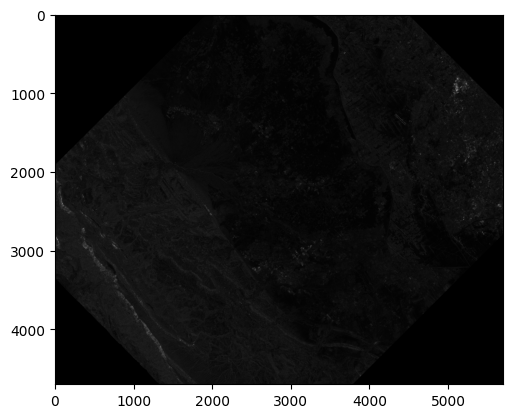

In [ ]:
try:
    # Read image from disk.
    img = cv2.imread("/content/Dadu city.tif")

     # Shape of image in terms of pixels.
    (rows, cols) = img.shape[:2]

    # getRotationMatrix2D creates a matrix needed for transformation.
    # We want matrix for rotation w.r.t center to 45 degree without scaling.
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    res1 = cv2.warpAffine(img, M, (cols, rows))

    # Write image back to disk.
    cv2.imwrite('result.tiff', res1)

except IOError:
    print('Error while reading files !!!')
plt.imshow(res1)

# **Translating Matrix**

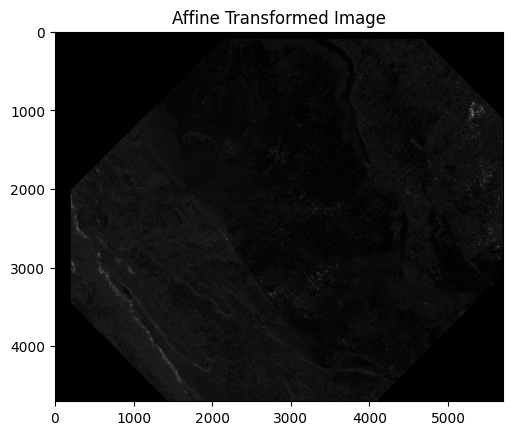

In [ ]:
import rasterio
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Open the GeoTIFF file using rasterio
file_path = "/content/result.tiff"
dataset = rasterio.open(file_path)

try:
    # Read the raster data
    img = dataset.read(1)  # Assuming a single band GeoTIFF, adjust the band index if needed

    # Get the number of rows and columns
    rows, cols = img.shape

    # Let's shift by (100, 50).
    M = np.float32([[1, 0, 100], [0, 1, 50]])

    # Perform the affine transformation on the image data
    res2 = cv2.warpAffine(img, M, (cols, rows))

    # Display the transformed image
    plt.imshow(res2, cmap='gray')
    plt.title("Affine Transformed Image")
    plt.show()

    # Write the transformed image back to disk
    cv2.imwrite('/content/result.tiff', res2)

except IOError:
    print('Error while reading files !!!')
dataset.close()


# **Canny Edge Detection**

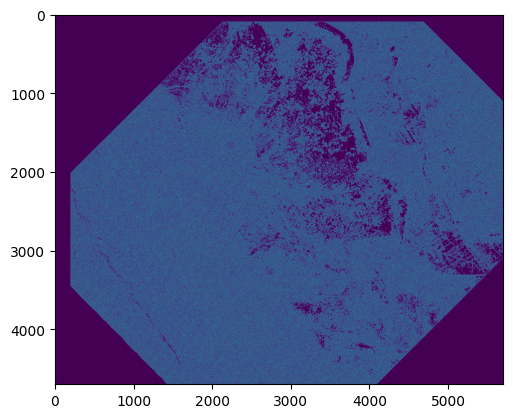

In [ ]:
try:
    # Read image from disk.
    img = cv2.imread("/content/result.tiff")


     # Canny edge detection.
    edges = cv2.Canny(img, 15, 10)

    # Write image back to disk.
    cv2.imwrite('result.tiff', edges)

except IOError:
    print('Error while reading files !!!')
plt.imshow(edges)

# **RGB**

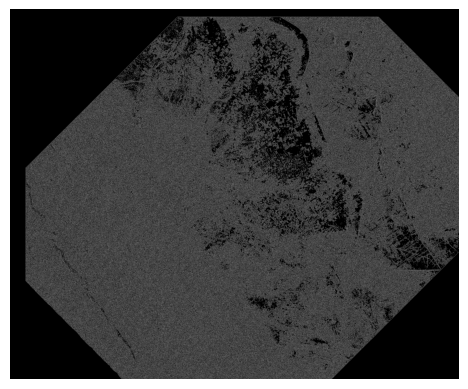

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img2 = cv2.imread("/content/result.tiff")

# Convert BGR to RGB color space (matplotlib expects RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img2_rgb)
plt.axis('off')  # Remove axis ticks and labels
plt.show()